           Model      BLEU     ROUGE      Time  Accuracy  Satisfaction  \
0         Linear  0.381534  0.331534  0.003437  0.381534      0.381534   
1          Ridge  0.381546  0.331546  0.002908  0.381546      0.381546   
2          Lasso  0.374982  0.324982  0.002982  0.374982      0.374982   
3   DecisionTree  0.000000  0.000000  0.005770 -0.291279     -0.291279   
4   RandomForest  0.358150  0.308150  0.265067  0.358150      0.358150   
5  GradientBoost  0.357235  0.307235  0.130984  0.357235      0.357235   

    Time_norm  Final Score  
0  290.927655    43.955952  
1  343.908167    51.903039  
2  335.329709    50.610691  
3  173.311185    25.880166  
4    3.772633     0.862822  
5    7.634530     1.441329  


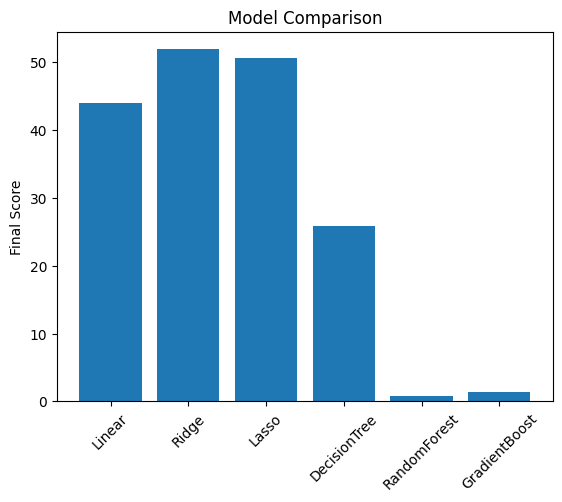

In [4]:

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

np.random.seed(42)

n = 1000

a = np.random.uniform(0.5, 2.0, n)
b = np.random.uniform(-1.0, 1.0, n)
c = np.random.uniform(0.1, 1.5, n)

x1 = np.random.uniform(0, 10, n)
x2 = np.random.uniform(0, 10, n)
x3 = np.random.uniform(0, 10, n)

noise = np.random.uniform(0, 0.2, n)

y = a*x1 + b*x2 + c*x3 + noise

data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
})

X = data[['x1','x2','x3']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoost": GradientBoostingRegressor()
}

results = []

for name, model in models.items():
    start = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    end = time.time()
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    time_taken = end - start
    
    
    bleu = max(0, r2)
    rouge = max(0, r2 - 0.05)
    
    satisfaction = r2 
    
    results.append([name, bleu, rouge, time_taken, r2, satisfaction])

columns = ["Model","BLEU","ROUGE","Time","Accuracy","Satisfaction"]
results_df = pd.DataFrame(results, columns=columns)

results_df

weights = {
    "BLEU": 0.30,
    "ROUGE": 0.15,
    "Time": 0.15,
    "Accuracy": 0.15,
    "Satisfaction": 0.25
}


results_df["Time_norm"] = 1 / results_df["Time"]

results_df["Final Score"] = (
    weights["BLEU"] * results_df["BLEU"] +
    weights["ROUGE"] * results_df["ROUGE"] +
    weights["Time"] * results_df["Time_norm"] +
    weights["Accuracy"] * results_df["Accuracy"] +
    weights["Satisfaction"] * results_df["Satisfaction"]
)

results_df.sort_values("Final Score", ascending=False)



plt.figure()
plt.bar(results_df["Model"], results_df["Final Score"])
plt.title("Model Comparison")
plt.ylabel("Final Score")
plt.xticks(rotation=45)
plt.show()